# Plot Anatomical Layout Tutorial

In the [`introductory_tutorial`](introductory_tutorial.ipynb) we ran through building structural covariance network analyses using `scona`🍪.

In this tutorial we'll cover some scona plotting tools for brain network visualisations.

Click on any of the links below to jump to that section
* [Get set up](#Get-set-up) (make sure to run this section before jumping into any of the others!)
* [Visualise the anatomical network](#Visualise the degree distribution%3A-%3Ccode%3Eplot_degree%3C%2Fcode%3E)  `plot_anatomical_network`

## Get set up

### Import the modules you need

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

### Read in the data, build a network and calculate the network metrics

If you're not sure about this step, please check out the [`introductory_tutorial`](introductory_tutorial.ipynb) notebook for more explanation.

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# Calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# Create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# Threshold G at cost 10 to create a binary graph with 10% as many edges as the complete graph G.
G10 = G.threshold(10)

## Visualise the brain network: `plot_anatomical_network`

While initialising the BrianNetwork Graph we set the coordinates for each node in the Graph (*centroids* parameter).

In the [`introductory_tutorial`](introductory_tutorial.ipynb) notebook we have calculated nodal measures for each node in the Graph.

We bet you are eager to visualise these nodes, right? - So we created visualisation tools to make pretty plots of nodes and edges based on the given anatomical layout.

[Anatomical planes and anatomical axes](https://en.wikipedia.org/wiki/Anatomical_terms_of_neuroanatomy#Planes_and_axes) are the following:  
1. Axial (horizontal)  plane - the plane that is horizontal and parallel to the axial plane of the body. It contains the lateral and the medial axes of the brain;

2. Sagittal plane - a vertical plane that passes from between the cerebral hemispheres, dividing the brain into left and right halves;

3. Coronal (frontal) plane - a vertical plane that passes through both ears, and contains the lateral and dorsoventral axes.  

In short:   
- The X-axis extends from the left side of the brain to the right side;  
- The Y-axis points from posterior to anterior;  
- The Z-axis points from inferior to superior;  

Color is more important than other aspects of figure style because color can reveal patterns in the data.  
The color of a node is determined based on the value of a nodal measure for this node.  

### Look at the data


Let's spend a few moments to display nodal attributes.


In [4]:
# store nodes attributes as a DataFrame
nodal_attributes = G10.report_nodal_measures()

# show 10 first nodes
nodal_attributes.iloc[0:10]

,name,centroids,x,y,z
0,lh_bankssts_part1,"[-56.40355, -40.152663, 1.708876]",-56.4036,-40.1527,1.70888
1,lh_bankssts_part2,"[-53.140506, -49.843038, 8.264557]",-53.1405,-49.843,8.26456
2,lh_caudalanteriorcingulate_part1,"[-5.001684, 20.645903, 25.733446]",-5.00168,20.6459,25.7334
3,lh_caudalmiddlefrontal_part1,"[-33.265925, 20.200202, 45.347826]",-33.2659,20.2002,45.3478
4,lh_caudalmiddlefrontal_part2,"[-31.958115, 2.146597, 51.26911]",-31.9581,2.1466,51.2691
5,lh_caudalmiddlefrontal_part3,"[-38.795007, 12.584757, 33.278581]",-38.795,12.5848,33.2786
6,lh_caudalmiddlefrontal_part4,"[-39.715079, 11.341351, 48.846438]",-39.7151,11.3414,48.8464
7,lh_cuneus_part1,"[-8.609127, -73.360119, 17.095238]",-8.60913,-73.3601,17.0952
8,lh_cuneus_part2,"[-5.3042, -87.102157, 19.323496]",-5.3042,-87.1022,19.3235
9,lh_entorhinal_part1,"[-24.010774, -5.86141, -32.826641]",-24.0108,-5.86141,-32.8266


You can see the information for a specific node from the graph itself.

In [5]:
# Display the nodal attributes of node[7]
G10.nodes[7]

{'centroids': array([ -8.609127, -73.360119,  17.095238]),
 'name': 'lh_cuneus_part1',
 'x': -8.609127,
 'y': -73.360119,
 'z': 17.095238}

Although note that the nodal measures need to be calculated.    
It hasn't been added to the attributes yet.

In [6]:
# Calculate nodal measures for graph G10
G10.calculate_nodal_measures()

Each node in the G10 Graph has now nodal measures calculated and stored as attributes.

In [7]:
# Display the nodal attributes for node[7]
G10.nodes[7]

{'betweenness': 0.00746329039579371,
 'centroids': array([ -8.609127, -73.360119,  17.095238]),
 'closeness': 0.4501466275659824,
 'clustering': 0.4311594202898551,
 'degree': 24,
 'module': 0,
 'name': 'lh_cuneus_part1',
 'participation_coefficient': 0.609375,
 'shortest_path_length': 2.2142857142857144,
 'x': -8.609127,
 'y': -73.360119,
 'z': 17.095238}

The following nodal measures have been calculated:
- betweenness  
- closeness  
- clustering  
- degree  
- module  
- participation_coefficient  
- shortest_path_length  

Look at all that information!

What is more, we are able to visualise nodes based on the nodal measures.  

Let's have a look at different scenarios!

### Import the code you need: `plot_anatomical_network`

In [8]:
# import the function to plot network measures
from scona.visualisations import plot_anatomical_network

### Plot the anatomical network

There are 2 required parameters for the plot_network_measures function:  
1. BrainNetwork graph whose nodes we are going to plot;
2. BrainNetwork graph whose edges are displayed;

#### Default settings

By default we visualize nodes according to the *module* measure and plot each node in the graph in *sagittal* orientation. There are plenty of parameters to make plotting flexible and pretty for you. Please refer to the documentation to have a detailed description of each parameter. 

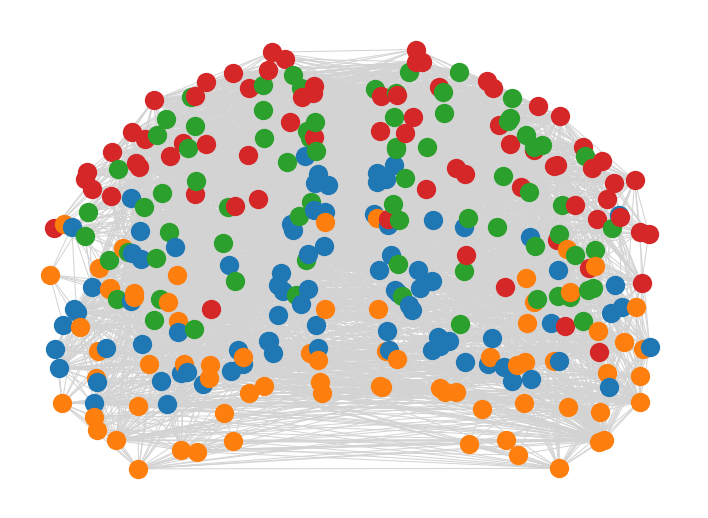

In [9]:
plot_anatomical_network(G10, G10)

Ohhhh...That look quite messy :( Because there are so many edges!

That's why we have 2nd required paramet - BrainNetwork Graph whose edges will be drawn

Our approach is to threshold the original weighted graph G at cost 2, i.e. to create a binary graph with 2% as many edges as the complete graph G.

In [10]:
# Threshold G at cost 2
G02 = G.threshold(2)

In [11]:
# get the number of edges of G10 Graph
G10.number_of_edges()

4728

In [12]:
# get the number of edges of G02 Graph
G02.number_of_edges()

946

Our main goal is to visualise the results of nodal measures calculations. That's why while plotting we can simply reduce the number of edges by thresholding at a small cost the initial Graph. In this way, we also keep biologically meaningful connections.

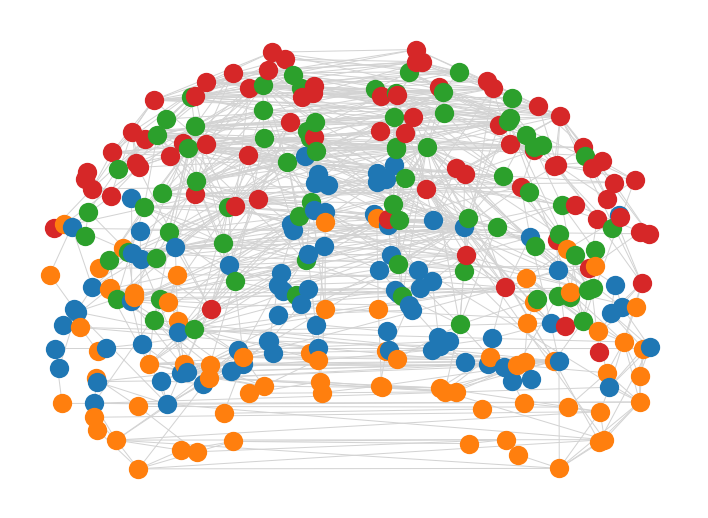

In [13]:
plot_anatomical_network(G10, G02)

#### Plot nodes according to the same measure ("module") in *axial* orientation

In [14]:
# plot_anatomical_network(G10, G02, orientation="axial")

#### Plot nodes according to the same measure ("module") *coronal* orientation

In [15]:
# plot_anatomical_network(G10, G02, orientation="coronal")

#### Save the plot with the given colormap

You can save this figure in any location.

You can do that by passing a file name and (optional) directory path to the `figure_name` option. 
If you don't set a directory path the figure will be saved in the local directory.

For this tutorial we'll save the output in a `figures` folder inside this `tutorials` directory.

Let's also use another colormap rather than the default one ("tab10").

Wide range of **colormaps** can be found at the [matplotlib page](https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html).

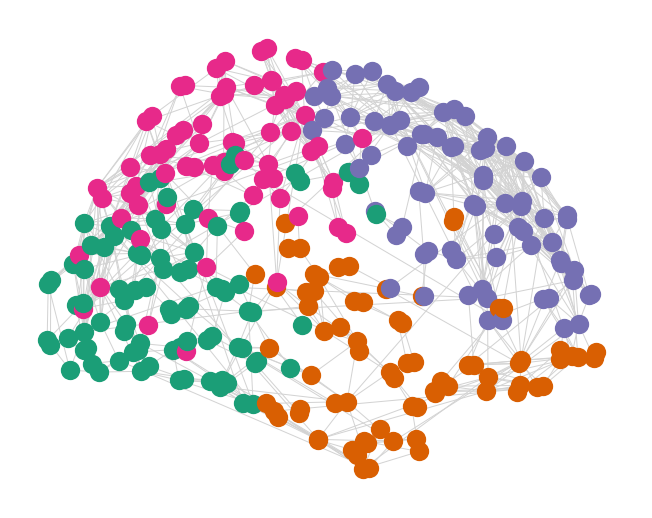

In [16]:
plot_anatomical_network(G10, G02, orientation="coronal", cmap_name="Dark2", 
                        figure_name="figures/Coronal_Layout.jpg")

☝️ Did you see an error message?

The code checks to see if the directory that you want to save your figure to actually exists.
If it doesn't then it creates the directory, but gives you a little warning first to check that it isn't coming as a surprised (for example if you have tried to save your figure in the wrong place!)

We have the `tutorials/figures` directory specifically ignored in this project so we shouldn't ever see changes there.

Note that if you don't pass a file ending the file will be saved as a `png` by default.

If you add a file extension allowed by `matplotlib` (eg `.jpg`, `.svg`, `.pdf` etc) then the figure will be saved in that format.

In case the given colormap does not exist, you will be notified about that and the default colormap - "tab10" will be used.

#### Plot in `axial` orientation with the `seaborn palette`

It is also possible to use seaborn palette instead of matplotlib colormaps only for **discrete measures** (like "module").  

In [17]:
# get 8 colors from "husl" color space
current_palette = sns.color_palette("husl", 8)

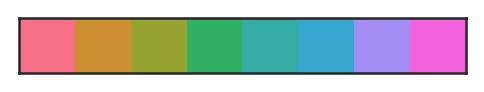

In [18]:
# display colors in palette
sns.palplot(current_palette)

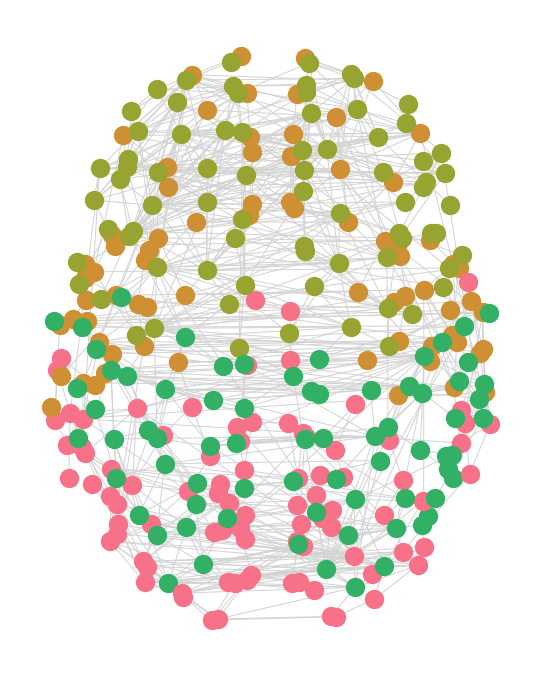

In [19]:
plot_anatomical_network(G10, G02, orientation="axial", sns_palette=current_palette,
                        figure_name="figures/CoronalLayou.pdf")

Seaborn color palette is great, because we can create a palette containing our own colors.

In [20]:
# for 4 different measures - 4 different colors
my_colors = ["#3498db", "#95a5a6", "#e74c3c","#2ecc71"]

In [21]:
my_palette = sns.color_palette(my_colors)

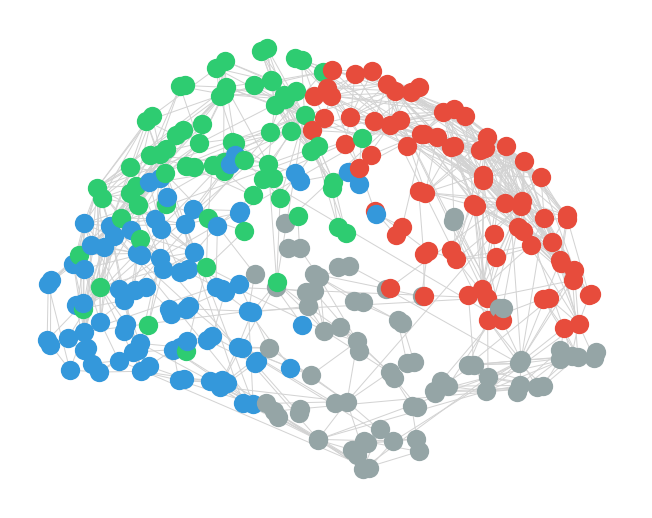

In [22]:
plot_anatomical_network(G10, G02, orientation="coronal", sns_palette=my_palette,
                        figure_name="figures/CoronalLayou.jpg")

#### Plot one highlighted node

Assume that you are interested in the 15th node in the Graph.  

*Note*: Remember that counting nodes in Graph starts from 0-index. So one could say that our special node is 16th in Graph.

In [23]:
G10.nodes[15]

{'betweenness': 0.005758174675541939,
 'centroids': array([-43.393728, -58.809524,  40.471545]),
 'closeness': 0.492776886035313,
 'clustering': 0.40561075394506135,
 'degree': 59,
 'module': 3,
 'name': 'lh_inferiorparietal_part1',
 'participation_coefficient': 0.6067222062625682,
 'shortest_path_length': 2.022727272727273,
 'x': -43.393728,
 'y': -58.809524,
 'z': 40.471545}

It is a 'lh_inferiorparietal_part1' brain region that has nodal measures displayed above.

Let's plot this node at *another size* than other nodes. **node_size** parameter will do that for us. We will set the size for our desired 15th node - 700, for others - 100.

In [24]:
# create the default size for all nodes in Graph
node_size = [100 for i in range(len(G10.nodes))]

In [25]:
# set size for our special node 
node_size[15] = 700

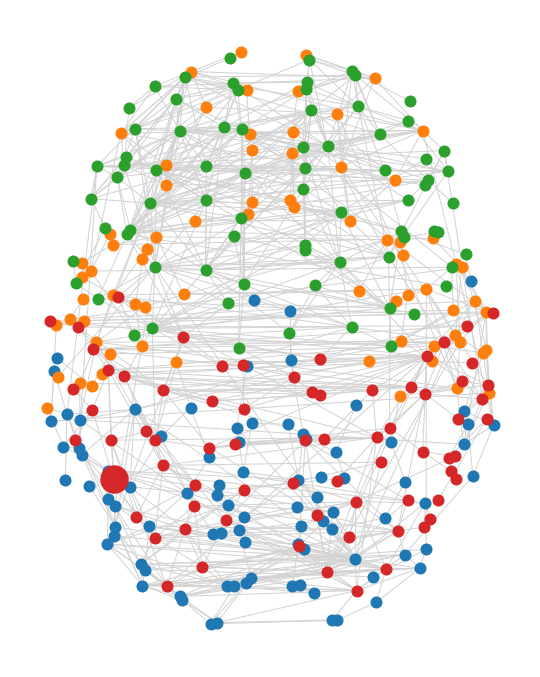

In [26]:
plot_anatomical_network(G10, G02, orientation="axial", node_size=node_size)

The node we have focused on is now easily noticeable from others on the plot. Let's put more emphasis by highlighting edges incident to the selected node. With the help of **edge_color** and **edge_width** parameters we will achieve the goal.

In [27]:
# report edges incident to the 15th node
edges_15 = list(G02.edges(15))

In [28]:
edges_15

[(15, 138), (15, 125), (15, 20), (15, 77), (15, 144)]

In [29]:
# get the edges of the G02 Graph
edge_list = list(G02.edges())

In [30]:
# set the color "lightgrey" for each edge in the Graph
color = "lightgrey"

edge_color = [color for i in range(len(edge_list))]

In [31]:
# highlight the edges incident to the 15th node (choose another color)

for edge in edges_15:
    # get the index of edges incident to 15th node from edge_list
    edge_index = edge_list.index(edge)
    
    # set another color for edges incident to 15th node
    edge_color[edge_index] = "black"

In [32]:
# set the diffrent size of edges incident to the 15th node

In [33]:
# set the size "1.0" for each edge in the Graph
edge_width = [1.0 for i in range(len(edge_list))]

In [34]:
# increase the size of edges incident to the 15th node

for edge in edges_15:
    # get the index of edges incident to 15th node from edge_list
    edge_index = edge_list.index(edge)
    
    # set another width for edges incident to 15th node
    edge_width[edge_index] = 3.0

Plot edges incident to the selected 15th node. 

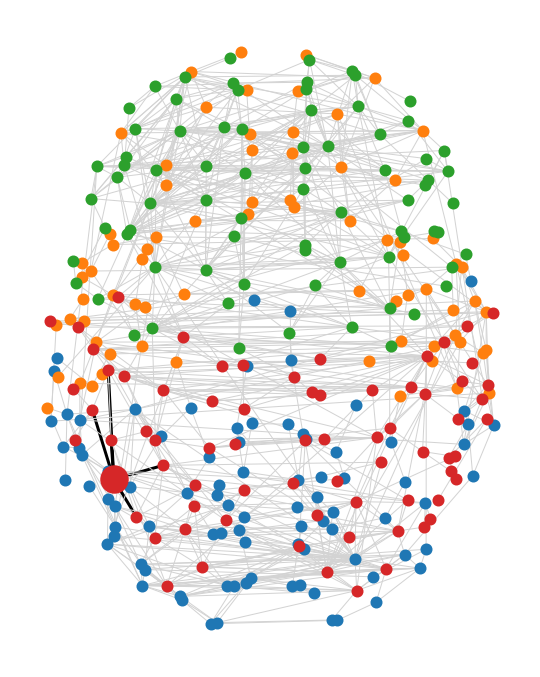

In [35]:
plot_anatomical_network(G10, G02, orientation="axial", node_size=node_size, 
                            edge_color=edge_color, edge_width=edge_width)

Plot only the edges incident to our selected 15th node 

In [36]:
edges_15

[(15, 138), (15, 125), (15, 20), (15, 77), (15, 144)]

In [37]:
# if you want each edge to have a diffrent color, we can set edge_color to be the list of desired colors
# edge_color = ["black", "pink", "orange", "blue", "grey"]

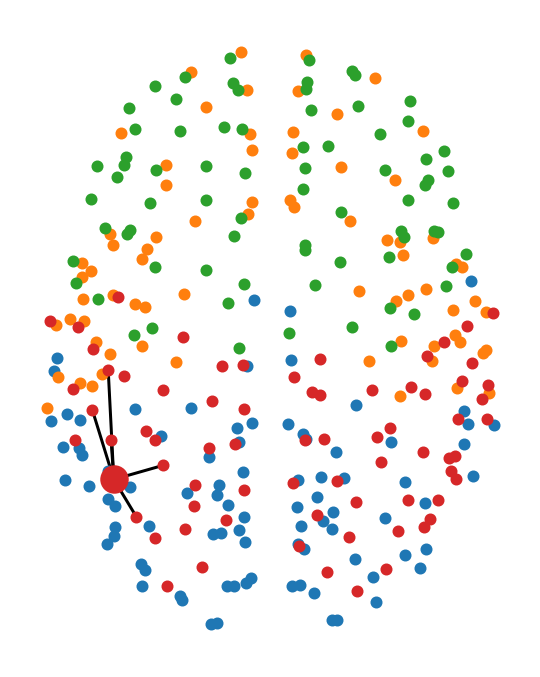

In [38]:
plot_anatomical_network(G10, G02, orientation="axial", node_size=node_size, edge_list=edges_15, 
                        edge_width=3, edge_color="black")

Let's stay with this example and eliminate all other nodes and edges.

In [39]:
# list of edges incident to the 15th Node
edges_15 = list(G02.edges(15))

edges_15

[(15, 138), (15, 125), (15, 20), (15, 77), (15, 144)]

In [40]:
# create list of nodes to plot
node_list = [15, 138, 125, 20, 77, 144]

In [41]:
# create list of sizes corresponding to each node in node_list
node_size = [300, 100, 100, 100, 100, 100]

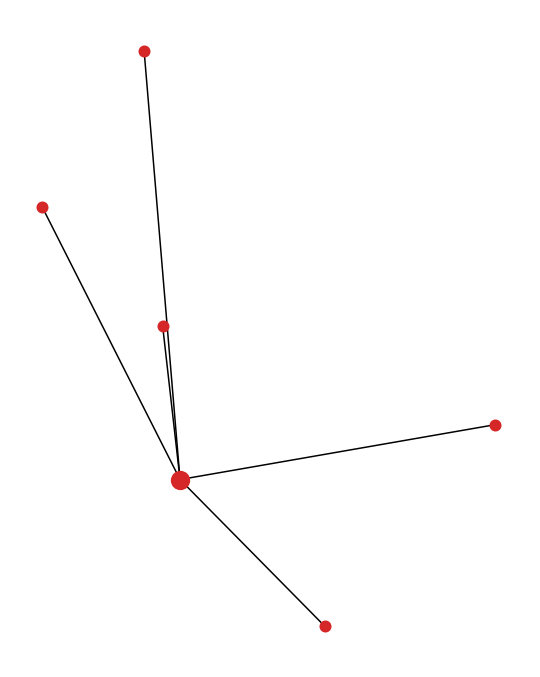

In [43]:
plot_anatomical_network(G10, G02, orientation="axial", node_list=node_list, node_size=node_size,
                            edge_list=edges_15, edge_color="black", edge_width=1.5)

#### Plot nodes with different sizes for specific nodes

The parameter **node_size** is responsible to handle this functionality.
The logic is the following:  
- if `node_size` - scalar -> apply this size to all nodes (default - 300);
- if `node_size` - array-like -> a sequence of sizes with the same length as node_list. 

In [44]:
# get the number of nodes in the Graph
num_nodes = G10.number_of_nodes()

#  select every 10th node
node_list=[i for i in range(0,num_nodes,10)]

Not let's randomly generate the size for each node in the *node_list* and store values in *node_size*.

In [45]:
import random

# create empty array to store sizes of nodes
node_size = list()

# set seed value to make random numbers predictable for reproducibility
random.seed(0)

for i in range(len(node_list)):
    
    # generate random number from 50 to 500
    size = random.randrange(50, 500)
    
    # add size of i-th node to the array
    node_size.append(size)

In [46]:
# a sequence of sizes with the same length as node_list
node_size

[482,
 247,
 438,
 265,
 70,
 182,
 311,
 298,
 257,
 451,
 474,
 205,
 294,
 233,
 348,
 161,
 308,
 121,
 194,
 121,
 436,
 98,
 366,
 459,
 178,
 322,
 411,
 464,
 358,
 125,
 208]

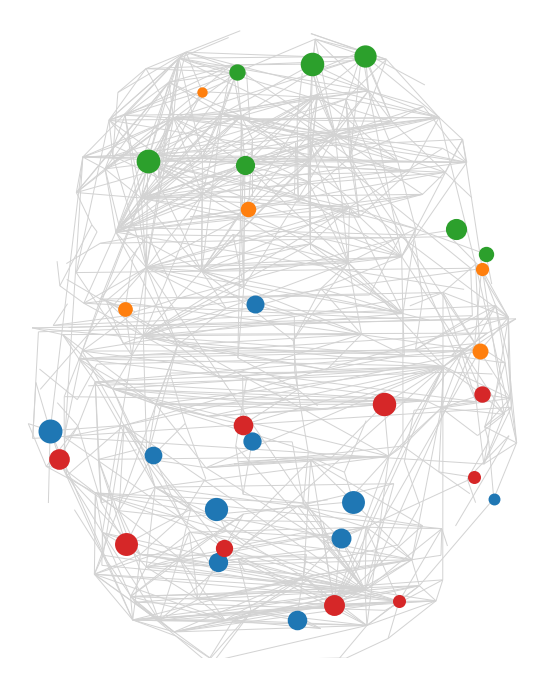

In [47]:
plot_anatomical_network(G10, G02, orientation="axial", node_list=node_list, 
                        node_size=node_size)

There are too many edges for our selected nodes (every 10th).  

Let's plot only edges incident to selected nodes.

In [48]:
node_list

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [49]:
# get only edges incident to these nodes
edges = list(G02.edges(node_list))

In [50]:
edges

[(0, 1),
 (0, 57),
 (0, 133),
 (0, 54),
 (0, 39),
 (0, 13),
 (0, 67),
 (10, 14),
 (10, 13),
 (10, 59),
 (10, 44),
 (20, 138),
 (20, 15),
 (20, 127),
 (20, 125),
 (20, 18),
 (30, 96),
 (30, 184),
 (40, 195),
 (40, 42),
 (40, 101),
 (40, 66),
 (40, 43),
 (40, 51),
 (50, 41),
 (50, 97),
 (50, 205),
 (60, 217),
 (60, 62),
 (60, 234),
 (60, 73),
 (70, 225),
 (70, 7),
 (80, 236),
 (90, 92),
 (100, 116),
 (100, 3),
 (100, 104),
 (100, 105),
 (100, 119),
 (100, 158),
 (100, 118),
 (100, 269),
 (100, 107),
 (100, 111),
 (100, 98),
 (100, 6),
 (100, 156),
 (100, 273),
 (100, 224),
 (100, 246),
 (100, 4),
 (110, 114),
 (110, 112),
 (110, 107),
 (110, 116),
 (110, 118),
 (110, 105),
 (110, 66),
 (110, 266),
 (110, 3),
 (110, 102),
 (120, 114),
 (120, 117),
 (120, 277),
 (120, 3),
 (120, 276),
 (120, 274),
 (120, 269),
 (120, 113),
 (120, 6),
 (120, 275),
 (120, 156),
 (120, 272),
 (120, 5),
 (120, 104),
 (120, 119),
 (120, 118),
 (130, 280),
 (130, 95),
 (130, 126),
 (130, 278),
 (130, 13),
 (130,

In [51]:
# select only edges that connect our chosen nodes between each other

# store edges that connect our chosen nodes in list
edges_connec = []

for edge in edges:
    if (edge[0] in node_list) and (edge[1] in node_list):
        edges_connec.append(edge)

In [52]:
edges_connec

[(130, 280), (180, 280), (190, 280), (250, 280)]

Plot the selected nodes and incident edges to the selected nodes in the orientation - coronal (why not)

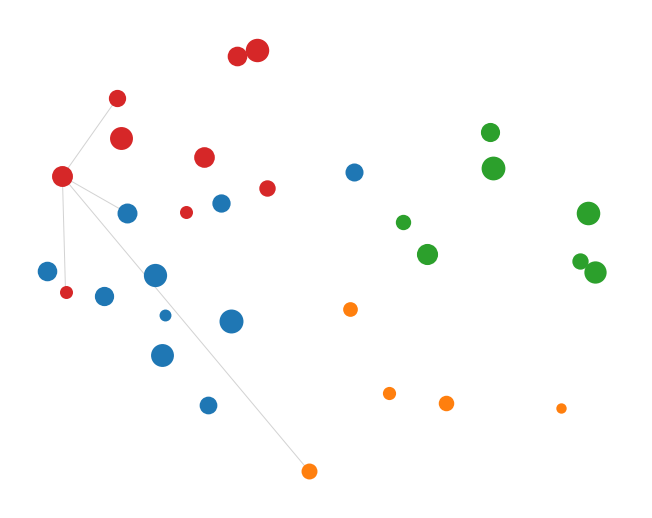

In [53]:
plot_anatomical_network(G10, G02, orientation="coronal", node_list=node_list, node_size=node_size,
                       edge_list=edges_connec)

So we can see that only node-280 has "connections" to other selected nodes. 2 of connected nodes are located in different modules.

#### Plot rich club nodes  

The rich-club coefficient is a metric on graphs and networks, designed to measure the extent to which well-connected nodes also connect to each other.  

Let's find out top 10 well-connected nodes.

In [54]:
# get the number of edges incident to each node
degrees = list(dict(G10.degree()).values())

In [55]:
# get the nodes that have the most connections to other nodes

def Nmaxelements(degrees, N):
    """
    Choose <N> largest numbers from degrees
    """
    final_list = [] 
  
    for i in range(0, N):  
        
        # find max
        max1 = 0
        for j in range(len(degrees)):      
            if degrees[j] > max1: 
                max1 = degrees[j]
        
        # get the index of max value
        index = degrees.index(max1)
        
        # remove the max element
        degrees.remove(max1)
        
        # store the node (index) that has the max value
        final_list.append(index) 
    
    return final_list

In [56]:
rich_club = Nmaxelements(degrees, 10)

In [57]:
rich_club

[278, 279, 4, 189, 36, 37, 3, 152, 32, 95]

Well-connected nodes are visually identified as a rectangular. By the way, you can change the shape of rich club nodes with the help of **rc_node_shape** parameter.

In order to make rich club nodes more "special", we can set the different node_size for them.

In [58]:
# create the default size for all nodes in Graph
node_size = [100 for i in range(len(G10.nodes))]

In [59]:
# change the size of rich club nodes
for i in rich_club:
    node_size[i] = 350

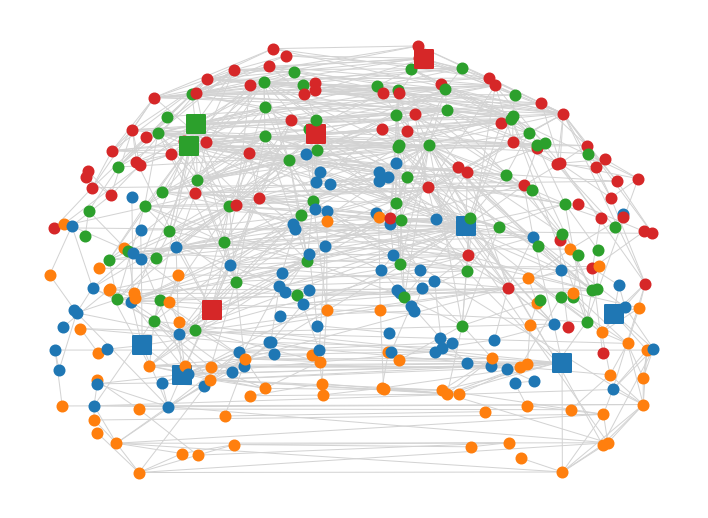

In [60]:
plot_anatomical_network(G10, G02, orientation="sagittal", rc_node=rich_club, node_size=node_size)

### Plot nodes with other measures than "module"

Take into account that values of all other measures rather than "module" are represented as a continuous data. To plot pretty figures use the sequential colormaps and set the parameter **continuous** to True.   

In [61]:
# Display the nodal attributes for node[7]
G10.nodes[7]

{'betweenness': 0.00746329039579371,
 'centroids': array([ -8.609127, -73.360119,  17.095238]),
 'closeness': 0.4501466275659824,
 'clustering': 0.4311594202898551,
 'degree': 24,
 'module': 0,
 'name': 'lh_cuneus_part1',
 'participation_coefficient': 0.609375,
 'shortest_path_length': 2.2142857142857144,
 'x': -8.609127,
 'y': -73.360119,
 'z': 17.095238}

#### Plot nodes with "betweenness" measure

- A measure shows a fraction of all shortest paths in the graph that pass through a node. Nodes with high values of betweenness centrality participate in a large number of shortest paths.  

!!! For **Kirstie**, This is the source wheres I took all the information about nodeal measures !!!   
http://braph.org/manual/graph-measures/  

https://sites.google.com/site/bctnet/measures/list  

https://transportgeography.org/?page_id=5981

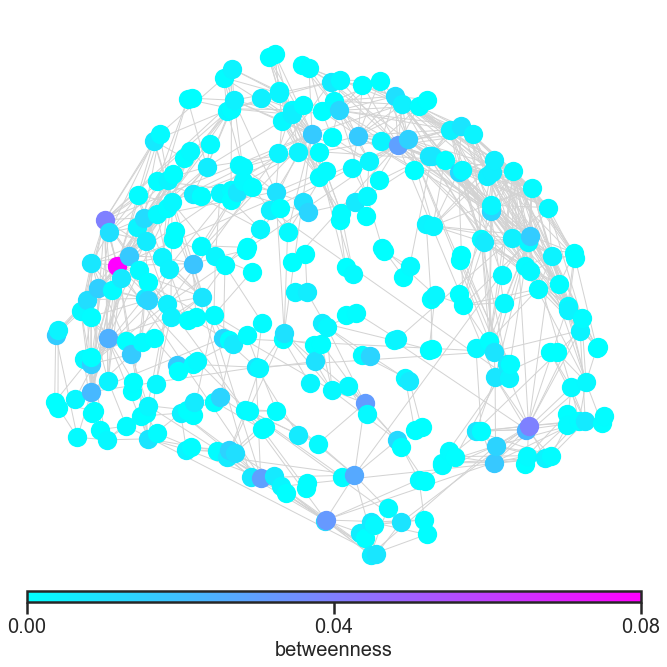

In [62]:
plot_anatomical_network(G10, G02, measure="betweenness", orientation="coronal", continuous=True, cmap_name="cool", 
                        figure_name="figures/betweenness")

#### Plot nodes with "degree" measure with rich_club nodes

-  Degree: Total number of edges connected to a node.

In [63]:
# use already calculated nodes with the largest incident edges 
rich_club

[278, 279, 4, 189, 36, 37, 3, 152, 32, 95]

In [64]:
# create the default size for all nodes in Graph
node_size = [150 for i in range(len(G10.nodes))]

# change the size of rich club nodes
for i in rich_club:
    node_size[i] = 350

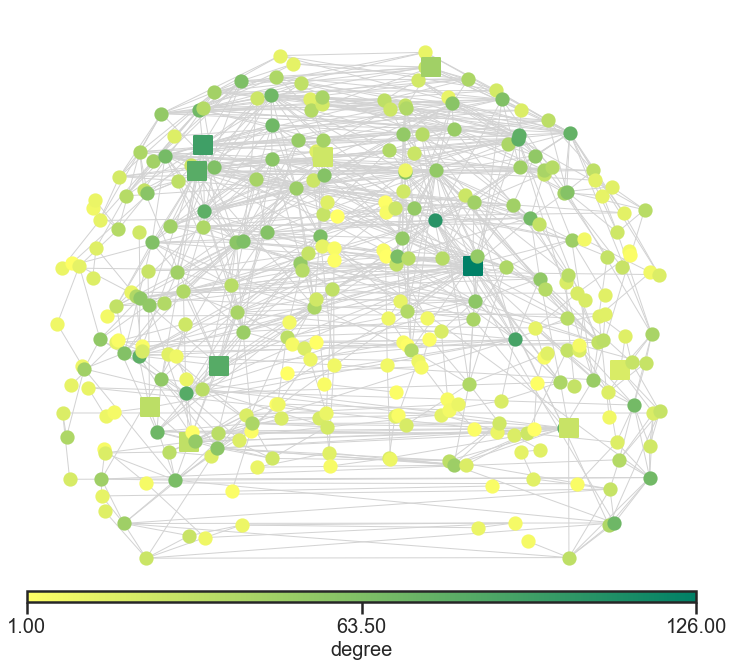

In [65]:
plot_anatomical_network(G10, G02, measure="degree", orientation="sagittal", rc_node=rich_club, node_size=node_size,
                        continuous=True, cmap_name="summer_r", figure_name="figures/DegreeMeasure.jpg")

#### Plot nodes with "participation_coefficient" measure with the given `vmin` and `vmax`
- Participation coefficient. Compares the number of links (order, degree) of node i to nodes in all clusters with its number of links within its own cluster.  

This measure quantifies the relation between the number of edges connecting a node outside its community and its total number of edges. Its calculation requires a previously determined community structure.

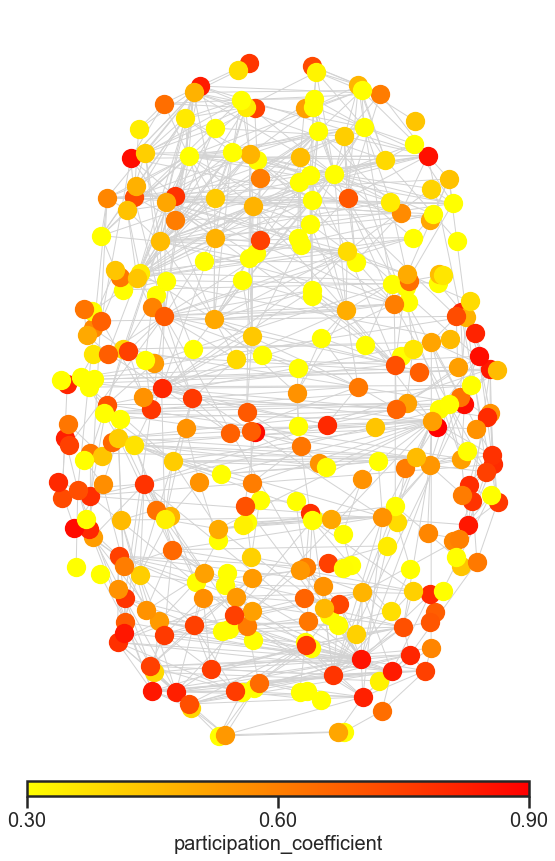

In [66]:
plot_anatomical_network(G10, G02, measure="participation_coefficient", orientation="axial", vmin=0.3, vmax=0.9,
                        continuous=True, cmap_name="autumn_r", figure_name="figures/ParticipationCoefficient")

#### Plot non-existed measure or Plot all nodes in monotone color

- This is the case when nodal measured have not been calculated for nodes before plotting. Or if the *measure* does not exist in nodal measures.


/home/pilot/anaconda3/lib/python3.6/site-packages/scona/visualisations.py:514: UserWarning: Measure "i-want-to-see-just-nodes" does not exist in the nodal attributes of Graph. The default color will be used for all nodes.
  "The default color will be used for all nodes.".format(measure))


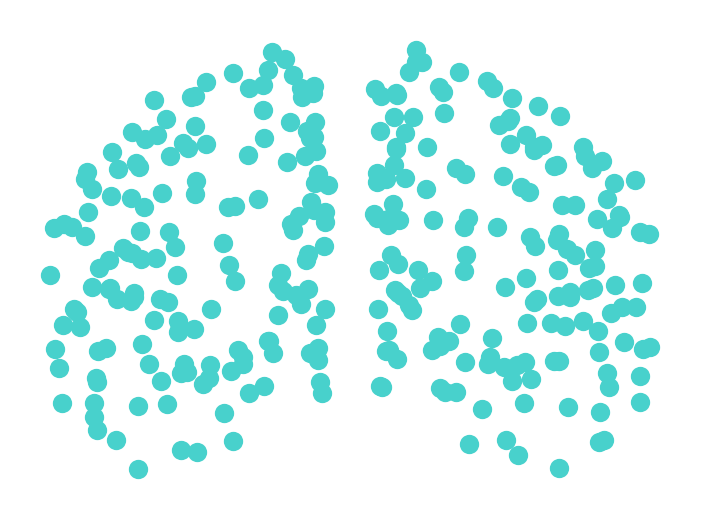

In [68]:
plot_anatomical_network(G10, G02, orientation="sagittal", edge_list=[], measure="i-want-to-see-just-nodes")